In [46]:
# Load the Pandas libraries with alias 'pd' 
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import statsmodels.api as sm
import seaborn as sns


from pandas import DataFrame
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline

In [2]:
# Read data from csv
data = pd.read_csv('co2.csv')

# preview dataset's head
data.head()

,MODEL_YEAR,MAKE,MODEL,VEHICLE_CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL_TYPE,FUEL_CONSUMPTION_CITY,FUEL_CONSUMPTION_HWY,FUEL_CONSUMPTION_COMB,FUEL_CONSUMPTION_COMB_MPG,CO2_EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [3]:
# summarize
data.describe()
#df.describe(include = 'all')

,MODEL_YEAR,ENGINE_SIZE,CYLINDERS,FUEL_CONSUMPTION_CITY,FUEL_CONSUMPTION_HWY,FUEL_CONSUMPTION_COMB,FUEL_CONSUMPTION_COMB_MPG,CO2_EMISSIONS
count,14343.000000,14343.000000,14343.000000,14343.000000,14343.000000,14343.000000,14343.000000,14343.000000
mean,2007.623022,3.474308,5.989054,12.914279,8.815708,11.071512,27.353483,248.530782
std,4.140223,1.310875,1.776277,3.549669,2.344114,2.976739,7.503766,59.144102
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2004.000000,2.400000,4.000000,10.600000,7.200000,9.100000,22.000000,209.000000
50%,2008.000000,3.400000,6.000000,12.400000,8.300000,10.500000,27.000000,239.000000
75%,2011.000000,4.300000,8.000000,14.900000,10.200000,12.800000,31.000000,285.000000
max,2014.000000,8.400000,16.000000,30.600000,19.000000,24.800000,78.000000,570.000000


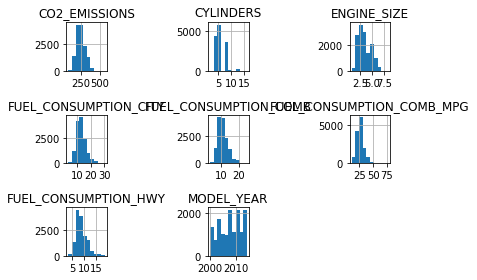

In [4]:
data.hist()
plt.tight_layout()
plt.show()


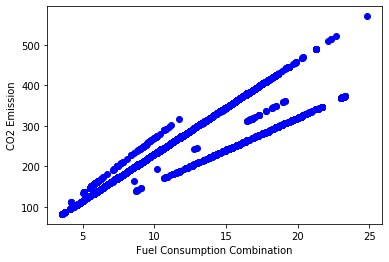

In [5]:
plt.scatter(data.FUEL_CONSUMPTION_COMB, data.CO2_EMISSIONS,  color='blue')
plt.xlabel("Fuel Consumption Combination")
plt.ylabel("CO2 Emission")
plt.show()

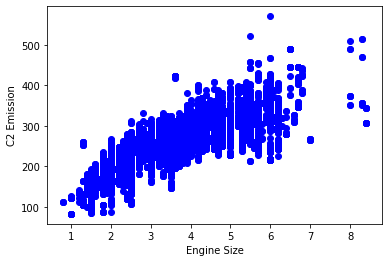

In [6]:
plt.scatter(data.ENGINE_SIZE, data.CO2_EMISSIONS,  color='blue')
plt.xlabel("Engine Size")
plt.ylabel("C2 Emission")
plt.show()

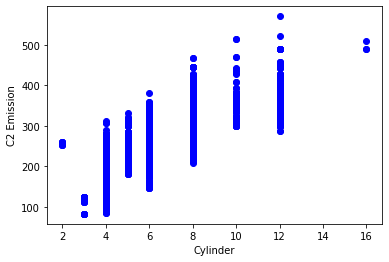

In [7]:
plt.scatter(data.CYLINDERS, data.CO2_EMISSIONS,  color='blue')
plt.xlabel("Cylinder")
plt.ylabel("C2 Emission")
plt.show()

In [8]:
reducedData = data[['ENGINE_SIZE','CYLINDERS','FUEL_CONSUMPTION_COMB','CO2_EMISSIONS']]

In [9]:
# bagi data
train, test = train_test_split(reducedData, test_size=0.3)
print(reducedData.shape, train.shape, test.shape)

(14343, 4) (10040, 4) (4303, 4)


In [10]:
train.head()

,ENGINE_SIZE,CYLINDERS,FUEL_CONSUMPTION_COMB,CO2_EMISSIONS
5932,6.0,8,11.0,253
2458,3.5,6,11.0,253
12561,2.5,4,8.1,186
6191,3.6,6,11.5,264
2518,2.7,6,9.9,228


In [11]:
test.head()

,ENGINE_SIZE,CYLINDERS,FUEL_CONSUMPTION_COMB,CO2_EMISSIONS
12360,3.6,6,9.8,225
2542,3.0,6,10.3,237
638,2.4,5,11.3,260
329,3.5,6,11.1,255
12896,2.0,4,6.5,150


In [12]:
dataxt = train[['ENGINE_SIZE','CYLINDERS', 'FUEL_CONSUMPTION_COMB']]
datayt = train['CO2_EMISSIONS']

datax = test[['ENGINE_SIZE','CYLINDERS', 'FUEL_CONSUMPTION_COMB']]
datay = test['CO2_EMISSIONS']

In [13]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(dataxt, datayt)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 42.629156642703435
Coefficients: 
 [ 5.49348245  4.77898759 14.31223575]


In [14]:
dataybyreg = regr.predict(datax)

In [67]:
dataframepredicted = pd.DataFrame(dataybyreg, columns=['CO2_EMISSIONS'])
dataframetest = pd.DataFrame(datay)
#dataframe = pd.DataFrame(dataybyreg)
# y_pred = algoRegresi.predict(X_test)

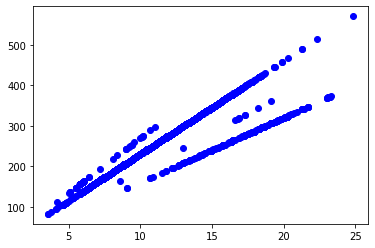

In [73]:
plt.scatter(datax.FUEL_CONSUMPTION_COMB, datay,  color='blue')

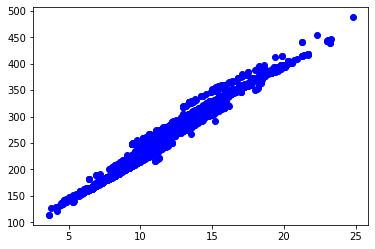

In [69]:
plt.scatter(datax.FUEL_CONSUMPTION_COMB, dataframepredicted.CO2_EMISSIONS,  color='blue')
plt.show()

In [76]:
df = pd.DataFrame({'Actual': dataframeabc.values.flatten(), 'Predicted': dataframe.values.flatten()})
df.describe()

,Actual,Predicted
count,4303.000000,4303.000000
mean,248.584708,249.465130
std,58.521301,56.057185
min,83.000000,113.983651
25%,209.000000,208.698311
50%,239.000000,238.712468
75%,285.000000,284.585790
max,570.000000,487.881349


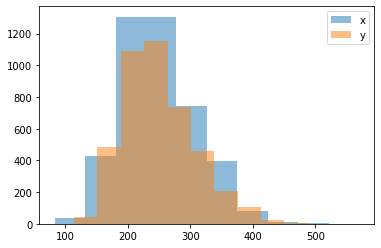

In [25]:
plt.hist(df.Actual, bins = 10, alpha=0.5, label='actual y from test')
plt.hist(df.Predicted, bins = 10, alpha=0.5, label='predicted y from test')
plt.legend(loc='upper right')
plt.show()

In [38]:
df.Predicted

0       231.339529
1       235.199558
2       241.436716
3       249.396088
4       165.761604
           ...    
4298    231.339529
4299    291.091445
4300    200.965898
4301    204.404641
4302    331.367935
Name: Predicted, Length: 4303, dtype: float64

In [36]:
df.Actual

0       225
1       237
2       260
3       255
4       150
       ... 
4298    225
4299    299
4300    186
4301    212
4302    350
Name: Actual, Length: 4303, dtype: int64

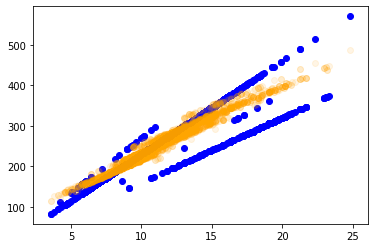

In [84]:
plt.scatter(datax.FUEL_CONSUMPTION_COMB, df.Actual, color='blue')
plt.scatter(datax.FUEL_CONSUMPTION_COMB, df.Predicted, color='orange', alpha = 0.1)
#plt.plot(datax.FUEL_CONSUMPTION_COMB, df.Predicted, color='red', linewidth=2)
plt.show()

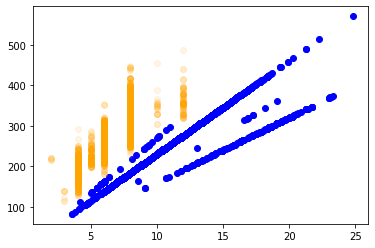

In [85]:
plt.scatter(datax.CYLINDERS, df.Actual, color='blue')
plt.scatter(datax.CYLINDERS, df.Predicted, color='orange', alpha = 0.1)
#plt.plot(datax.FUEL_CONSUMPTION_COMB, df.Predicted, color='red', linewidth=2)
plt.show()

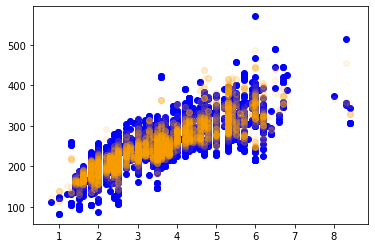

In [86]:
plt.scatter(datax.ENGINE_SIZE, df.Actual, color='blue')
plt.scatter(datax.ENGINE_SIZE, df.Predicted, color='orange', alpha = 0.1)
#plt.plot(datax.FUEL_CONSUMPTION_COMB, df.Predicted, color='red', linewidth=2)
plt.show()

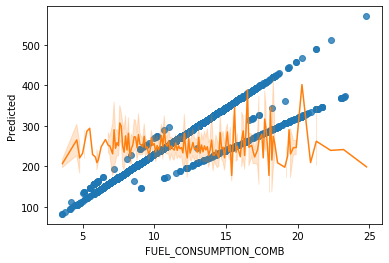

In [63]:

sns.regplot(datax.FUEL_CONSUMPTION_COMB, df.Actual, fit_reg=False)
sns.lineplot(datax.FUEL_CONSUMPTION_COMB, df.Predicted)

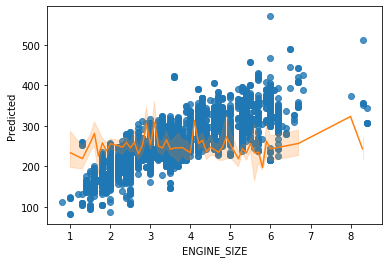

In [88]:
sns.regplot(datax.ENGINE_SIZE, df.Actual, fit_reg=False)
sns.lineplot(datax.ENGINE_SIZE, df.Predicted)

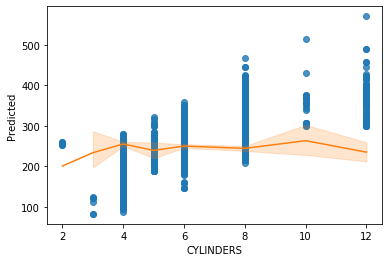

In [87]:
sns.regplot(datax.CYLINDERS, df.Actual, fit_reg=False)
sns.lineplot(datax.CYLINDERS, df.Predicted)

In [45]:
print('Mean Absolute Error:', metrics.mean_absolute_error(df.Actual, df.Predicted))
print('Mean Squared Error:', metrics.mean_squared_error(df.Actual, df.Predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df.Actual, df.Predicted)))

Mean Absolute Error: 13.852947538694302
Mean Squared Error: 492.32089275505126
Root Mean Squared Error: 22.188305315076484


In [ ]:
#import statsmodels.formula.api as sm
